# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Paulinus Alan Sanjaya Jamlu
- **Email:** alanjamlu09@gmail.com
- **ID Dicoding:** alan_jamlu

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apa faktor yang paling berpengaruh pada jumlah pengguna sepeda registered dan casual
- Pertanyaan 2 : Pada Musim apa pengguna sepeda registered dan casual paling sering menggunakan jasa *Bike Sharing*

## Import Semua Packages/Library yang Digunakan

In [162]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Wrangling

### Gathering Data

In [163]:
df_hour = pd.read_csv('data/hour.csv', sep = ',')
df_day = pd.read_csv('data/day.csv', sep = ',')

Bagian berikut ini digunakan untuk melihat secara sepintas dataset yang akan dianalisis

In [164]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [165]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

In [166]:
# Mencari missing value
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Bagian di atas digunakan untuk mencari missing value pada dataset df_day

In [167]:
# Mencari data duplikat
df_day.duplicated().sum()

0

pada bagian di atas digunakan untuk mencari apakah data memiliki data duplikat atau tidak

In [168]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada `df_day.info()`, kita mencari informasi berupa jenis data untuk setiap kolom pada dataset. Jika ada yang ingin disesuaikan, akan dirubah pada bagian Data Cleaning

Bagian Berikut ini adalah jenis analisis yang sama seperti sebelumnya (di dataset `df_day`).

In [169]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [170]:
df_hour.duplicated().sum()

0

In [171]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

In [172]:
df_day['dteday']=pd.to_datetime(df_day['dteday'])
df_hour['dteday']=pd.to_datetime(df_hour['dteday'])
kolom = ['season','yr','mnth','holiday','weathersit']
df_hour[kolom] = df_hour[kolom].astype('category')
df_day[kolom] = df_day[kolom].astype('category')

kode di atas digunakan untuk mengubah jenis dataset pada kolom `dteday` untuk kedua dataset menjadi tanggal dan kolom `season, yr, mnth, holiday, weathersit` menjadi kategorial menggunakan pandas.

In [173]:
df_hour['season'].agg('unique')
df_hour['season'] = df_hour['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})
df_day['season'] = df_day['season'].cat.rename_categories({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

menggunakan .`rename_categories` untuk mengubah nama season agar lebih mudah dipahami untuk keperluan analisis selanjutnya

In [174]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [175]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(5), datetime64

kedua dataset diatas tidak memiliki missing value dan nilai duplikat. Selain itu, jenis datanya juga sudah disesuakikan dengan data aslinya.

## Exploratory Data Analysis (EDA)

### Explore ...

In [176]:
df_hour.groupby(by='dteday')['cnt'].sum()

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64

pivot tabel ini digunakan untuk melihat hubungan antara dataset df_hour dan df_day dengan asumsi bahwa kolom cnt pada dataset df_day sama dengan total penggunaan harian pada dataset df_hour. Setelah dilihat, total kolom cnt untuk kedua dataset perbandingan setiap harinya adalah sama (setidaknya dilihat dari 5 data awal dan akhir).

In [177]:
df_day.describe()

,instant,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [178]:
df_hour.describe()

,instant,hr,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,3.003683,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,6.914405,2.005771,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,1.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,12.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,18.000000,5.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,23.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


`describe()` digunakan untuk memberikan gambaran umum terkait data yang digunakan.

In [179]:
df_day.corr()

<ipython-input-179-d86ec6c860d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_day.corr()


,instant,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,-0.000016,-0.004337,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
weekday,-0.000016,1.000000,0.035790,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.035790,1.000000,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
temp,0.150580,-0.000170,0.052660,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,-0.007537,0.052182,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.016375,-0.052232,0.024327,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,0.014282,-0.018796,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.275255,0.059923,-0.518044,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.659623,0.057367,0.303907,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.628830,0.067443,0.061156,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


In [180]:
df_hour.corr()

<ipython-input-180-3f825b9665f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_hour.corr()


,instant,hr,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,-0.004775,0.001357,-0.003416,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
hr,-0.004775,1.000000,-0.003498,0.002285,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
weekday,0.001357,-0.003498,1.000000,0.035955,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.002285,0.035955,1.000000,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
temp,0.136178,0.137603,-0.001795,0.055390,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.133750,-0.008821,0.054667,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.276498,-0.037158,0.015688,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,0.137252,0.011502,-0.011830,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.301202,0.032721,-0.300942,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.282046,0.374141,0.021578,0.134326,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151


kita melihat korelasi antar kolom dalam kedua dataset yang digunakan menggunakan `.corr()`. Sesuai dengan pertanyaan pertama, kita akan mencari kolom dengan nilai korelasi yang paling tinggi (nilai normalnya mendekati 1) dengan kolom casual dan registered dan tidak menyertakan korelasi dengan dirinya sendiri.
Haslinya, kedua dataset diatas memberikan nilai korelasi yang tinggi antara pengguna Casual dan Registered dengan kolom Temp. Artinya, temperatur udara sangat mempengaruhi jumlah pengguna Bike Sharing.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa faktor yang paling berpengaruh pada jumlah pengguna sepeda registered dan casual

Plotting jumlah pengguna Casual dan Registered Bike Sharing

Text(0.5, 1.0, 'Persentase Pengguna (Casual vs Registered)')

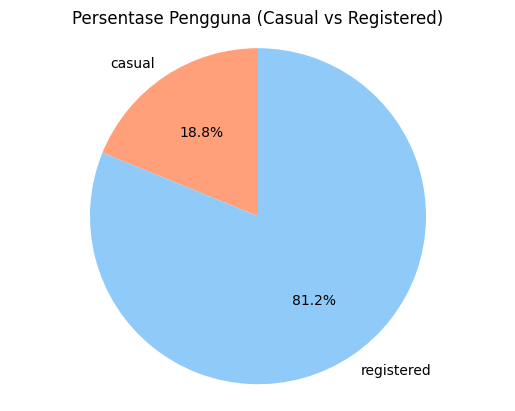

In [181]:
user_counts_data = df_day[['casual', 'registered']].sum()
# Plotting pie plot
fig_pie, ax_pie = plt.subplots()
ax_pie.pie(user_counts_data, labels=user_counts_data.index, autopct='%2.1f%%', startangle=90, colors=['#FFA07A', '#90CAF9'])
ax_pie.axis('equal')
ax_pie.set_title("Persentase Pengguna (Casual vs Registered)")

ini adalah persentase dari jumlah pengguna Bike Sharing dari semua dataset 'day'

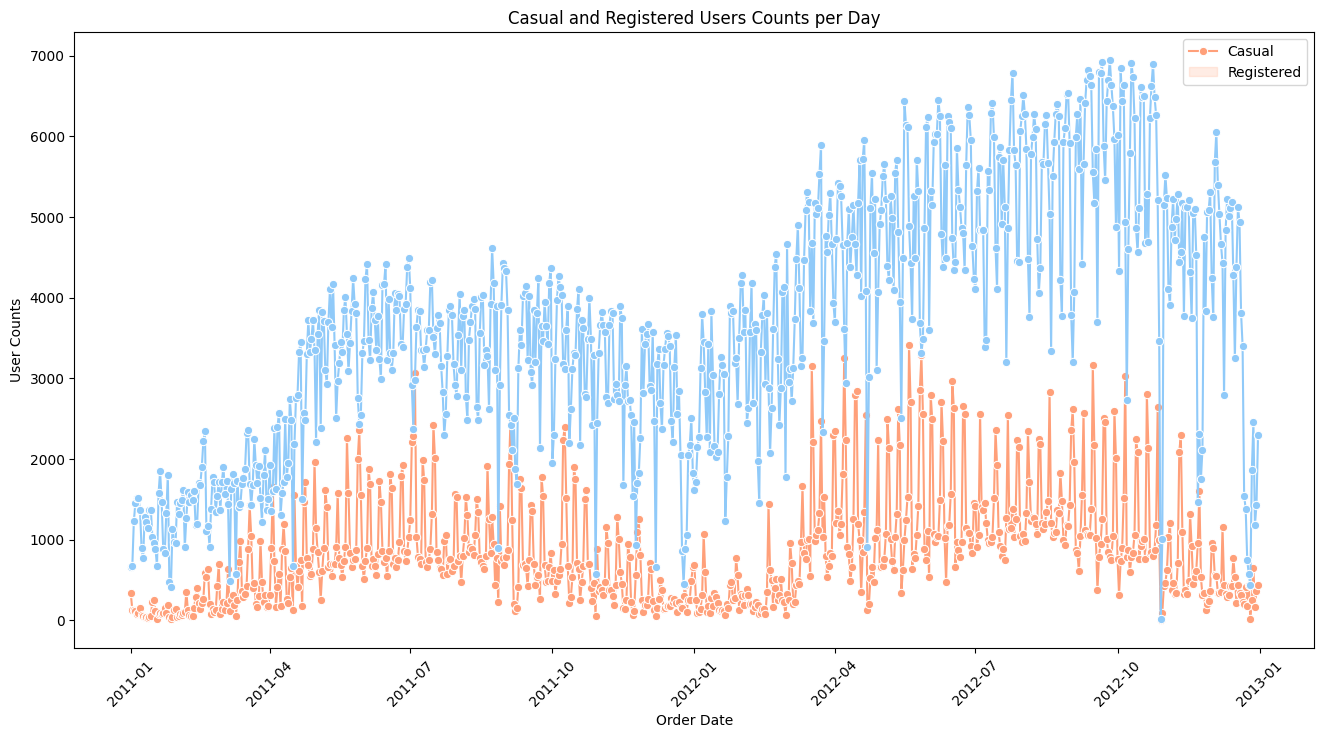

In [182]:
# set figure size
fig_fh3, ax_fh3 = plt.subplots(figsize=(16, 8))
# Plotting
sns.lineplot(x='dteday', y='casual', data=df_day, ax=ax_fh3, label='Casual', marker='o', color="#FFA07A")
sns.lineplot(x='dteday', y='registered', data=df_day, ax=ax_fh3, label='Registered', marker='o', color="#90CAF9")
ax_fh3.set_ylabel("User Counts")
ax_fh3.set_xlabel("Order Date")
ax_fh3.set_title("Casual and Registered Users Counts per Day")
ax_fh3.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
ax_fh3.legend(["Casual", "Registered"])

Plot di atas adalah perubahan jumlah pengguna Bike Sharing setiap harinya

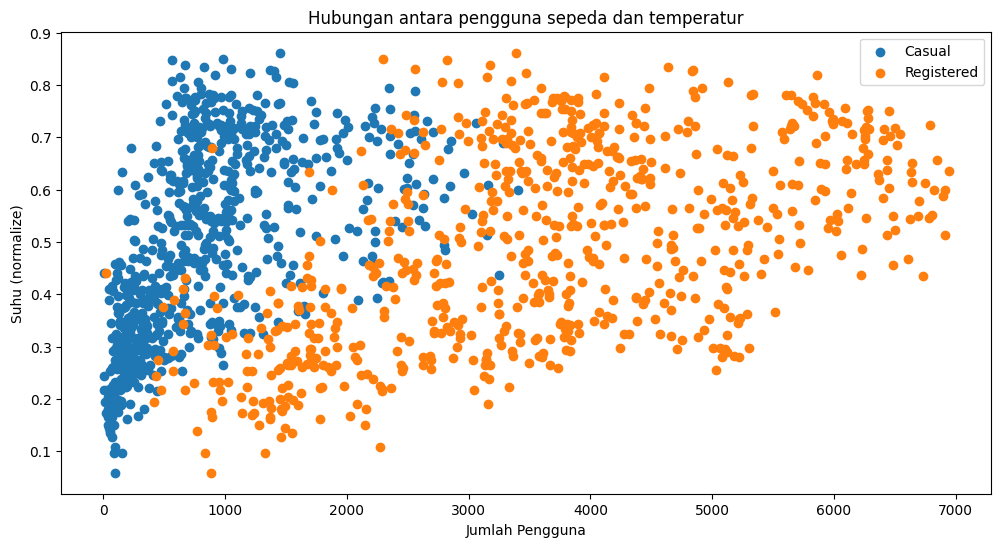

In [183]:
plt.figure(figsize=(12, 6))
plt.scatter(df_day['casual'], df_day['temp'], label='Casual')
plt.scatter(df_day['registered'], df_day['temp'], label='Registered')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Suhu (normalize)')
plt.legend()
plt.title('Hubungan antara pengguna sepeda dan temperatur')
plt.show()

Memvisualisasikan dataset df_day untuk melihat hubungan antara jumlah pengguna Casual dan Registered dengan Suhu. Dapat terlihat bahwa, semakin dingin (suhu rendah), maka semakin sedikit pengguna sepeda dan begitu sebalinya. Semakin panas (suhu tingi), semakin banyak pengguna sepeda.

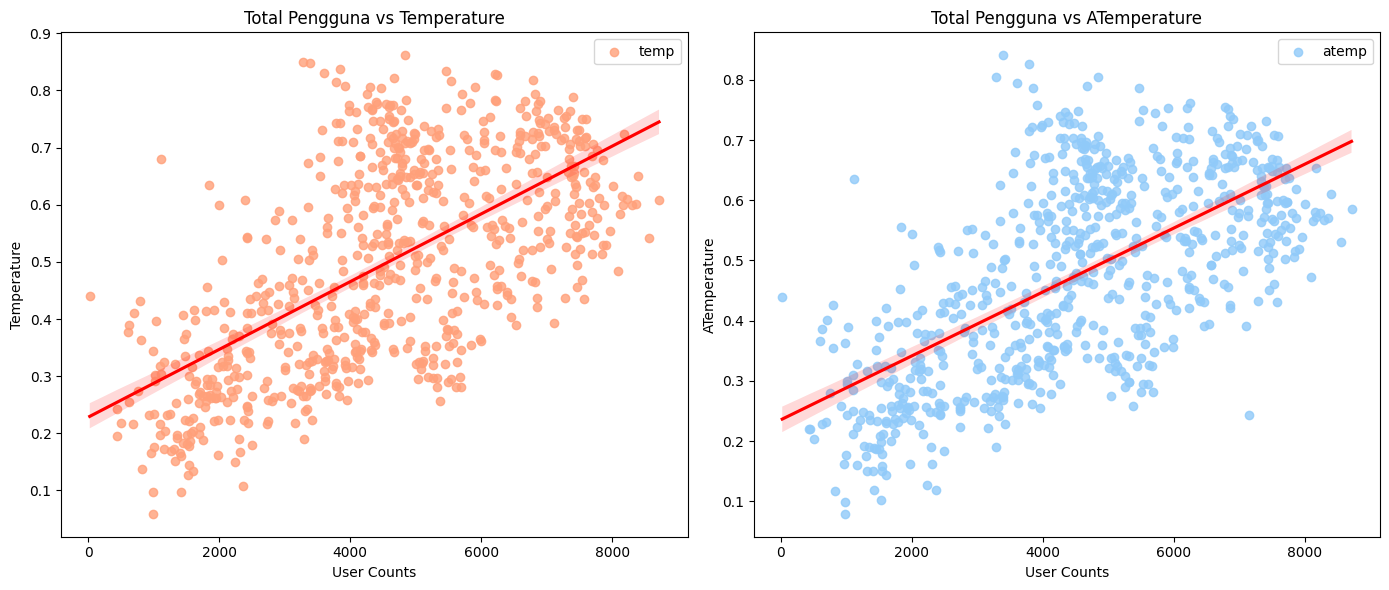

In [207]:
# Membuat subplot dengan 1 baris dan 2 kolom
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot pertama (kiri)
sns.regplot(x='cnt', y='temp', data=df_day, label='temp', color="#FFA07A", line_kws={'color': 'red'}, ax=axes[0])
axes[0].set_ylabel("Temperature")
axes[0].set_xlabel("User Counts")
axes[0].set_title("Total Pengguna vs Temperature")
axes[0].legend()

# Plot kedua (kanan)
sns.regplot(x='cnt', y='atemp', data=df_day, label='atemp', color="#90CAF9", line_kws={'color': 'red'}, ax=axes[1])
axes[1].set_ylabel("ATemperature")
axes[1].set_xlabel("User Counts")
axes[1].set_title("Total Pengguna vs ATemperature")
axes[1].legend()

# Menampilkan plot
plt.tight_layout()
plt.show()


Dengan membuat garis regresi linear masing-masing untuk kedua plot , kita dapat melihat tren kenaikan jumlah pengguna saat temperatur lebi tinggi

### Pertanyaan 2:

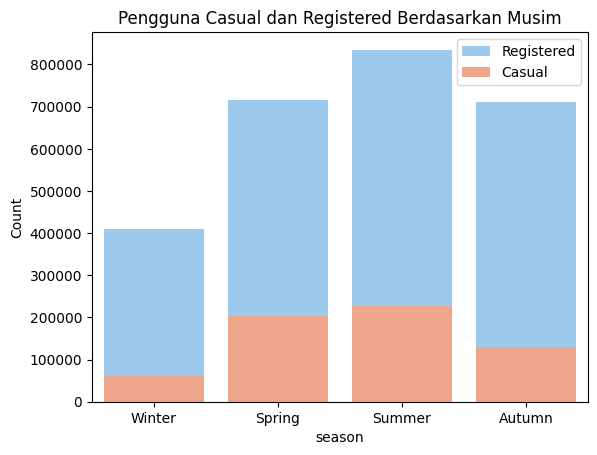

In [186]:
season_data= df_day.groupby('season').agg({
    'casual':'sum',
    'registered':'sum'
}).reset_index()
fig_fh1, ax_fh1 = plt.subplots()
sns.barplot(x='season', y='registered', data=season_data, ax=ax_fh1, label='Registered', color="#90CAF9")
sns.barplot(x='season', y='casual', data=season_data, ax=ax_fh1, label='Casual', color="#FFA07A")
ax_fh1.set_ylabel("Count")
ax_fh1.set_title(f"Pengguna Casual dan Registered Berdasarkan Musim")
ax_fh1.legend()

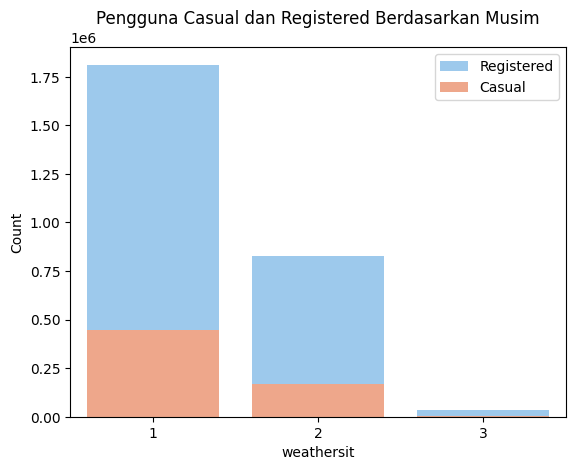

In [194]:
season_data= df_day.groupby('weathersit').agg({
    'casual':'sum',
    'registered':'sum'
}).reset_index()
fig_fh1, ax_fh1 = plt.subplots()
sns.barplot(x='weathersit', y='registered', data=season_data, ax=ax_fh1, label='Registered', color="#90CAF9")
sns.barplot(x='weathersit', y='casual', data=season_data, ax=ax_fh1, label='Casual', color="#FFA07A")
ax_fh1.set_ylabel("Count")
ax_fh1.set_title(f"Pengguna Casual dan Registered Berdasarkan Musim")
ax_fh1.legend()


## Conclusion

Setelah kita melihat bahwa dataset hour merupakah rincian pengguna sepeda per jam dari dataset day, maka kita dapat menggunakan salah satu dataset yang relevan dengan pertanyaan kita yaitu dataset day. Lalu, setelah _Visualization & Explanatory Analysis_, didapat kesimpulan dari kedua pertanyaa sebagai berikut:


1.   Pertanyaan 1: Apa faktor yang paling berpengaruh pada jumlah pengguna sepeda registered dan casual
Dari analisis korelasi antar variabel, ditemukan bahwa temperatur merupakan faktor yang paling tinggi untuk menentukan jumlah pengguna sepeda. Dari visualisasi dataset yang diberikan berdasarkan temperatur, terlihat bahwa semakin tinggi suhu, maka semakin banyak juga pengguna sepeda.


2.   Pertanyaan 2: Pada Musim apa pengguna sepeda registered dan casual paling sering menggunakan jasa Bike Sharing
pada 2 plot terakhir dari pivot table, untuk pengguna Casual dan Registered, season Summer merupakan season dengan jumlah pengguna paling banyak.

Dari pertanyaan 1 dan 2, memiliki kesimpulan yang serupa bahwa pengguna Bike Sharing lebih suka bersepeda pada suhu yang cenderung tinggi yaitu sekitar musim panas (Summer) dan pada musim dingin pengguna Bike Sharing sangat sedikit karena suhu udara yang sangat dingin.



## Clustering

In [215]:
df_cluster = df_hour.groupby(['hr']).agg({
    'cnt':'sum'
})
df_cluster.reset_index().head()
# Memeriksa hasil
print(array_cluster)


[ 39130  24164  16352   8174   4428  14261  55132 154171 261001 159438
 126257 151320 184414 184919 175652 183149 227748 336860 309772 226789
 164550 125445  95612  63941]


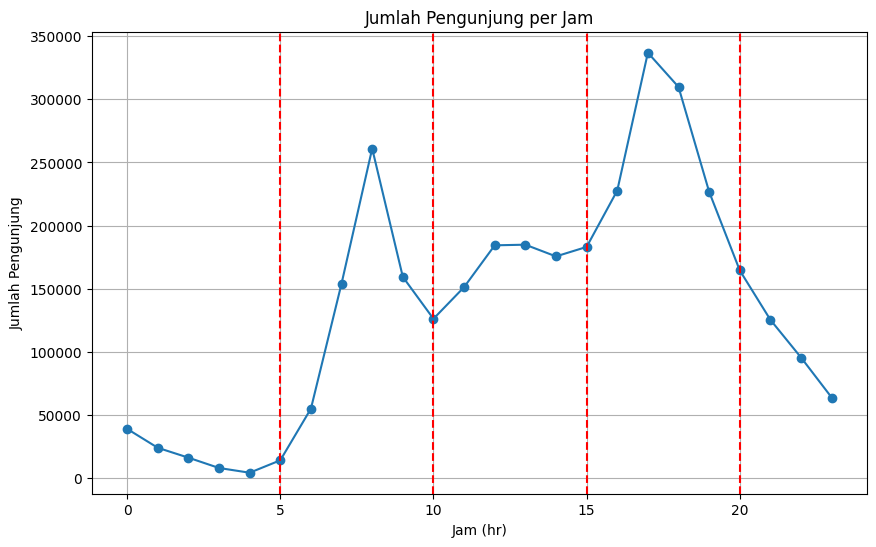

In [209]:
# Plot jumlah pengunjung per jam
plt.figure(figsize=(10, 6))
plt.plot(df_cluster['hr'], df_cluster['cnt'], marker='o')
plt.title('Jumlah Pengunjung per Jam')
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Pengunjung')
plt.grid(True)

# Menambahkan garis vertikal putus-putus di jam 5, 10, 15, dan 20
plt.axvline(x=5, linestyle='--', color='red')
plt.axvline(x=10, linestyle='--', color='red')
plt.axvline(x=15, linestyle='--', color='red')
plt.axvline(x=20, linestyle='--', color='red')

plt.show()

**Penjelasan Klasterisasi**

Plot di atas adalah klasterisasi sederhana untuk membagi jam pelayanan Bike Sharing dalam beberapa kategori. Kategori yang digunakan adalah:
1. Jam sepi pengguna; Untuk jam sepi pengguna dari tabel diatas adalah dari jam 0 hingga 5
2. Jam sedang pengguna; Untuk jam sedang pengguna dari tabel diatas adalah jetelah jam 10 hingga jam 15, lalu diikuti oleh jam 20 hingga sebelum jam 0.
3. Jam ramai pengguna; Untuk jam sedang pengguna dari tabel diatas adalah jetelah jam 5 hingga jam 10, lalu diikuti oleh jam 15 hingga sebelum jam 20.
Asumsi yang bisa diambil dari klasterisasi tersebut adalah bahwa Bike Sharing ramai pengguna pada jam berangkat kerja dan saat pulang kerja. Pada siang hari, pengguna cenderung "standar" atau tidak terlalu ramai. Sedangkan pada saat larut malam hingga pagi saat masih istirahat, pengguna sangat sedikit.
